In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [140]:
data = pd.read_csv('./data/k-means/cluster0.csv')
print(data.shape)
data.head()

(124, 7)


,area_ind,area_trans,area_res,area_inst,area_com,area_nat,area_os
0,1.883810,0.000000,47.105677,4.311561,6.265026,0.000000,0.114855
1,9.261876,0.000000,42.983594,6.070761,13.514990,0.000636,0.000000
2,0.278748,0.000000,42.222258,5.476350,20.957797,0.000000,0.000000
3,0.000000,1.916034,38.435531,9.628740,11.315646,0.000000,0.000000
4,0.633048,0.861805,29.572570,3.731788,16.896633,3.442408,0.530283


In [141]:
data = data.T

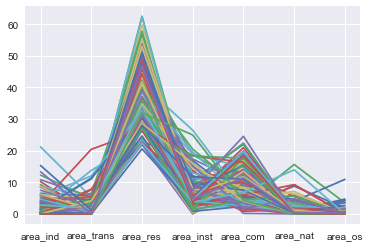

In [142]:
plt.plot(data)

In [143]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
area_ind,1.883810,9.261876,0.278748,0.000000,0.633048,3.125596,1.900326,5.152086,0.181716,0.000000,...,0.000000,0.230199,2.068411,4.121813,0.000000,2.862165,15.315319,0.046746,0.000000,13.332072
area_trans,0.000000,0.000000,0.000000,1.916034,0.861805,6.063522,5.672742,1.120063,2.821833,0.000000,...,0.377192,3.644278,1.810335,0.000000,4.142737,1.731597,1.188278,0.000000,0.000000,0.000000
area_res,47.105677,42.983594,42.222258,38.435531,29.572570,28.745163,36.016807,28.851642,41.784775,49.403451,...,50.822811,26.833273,45.990996,31.388898,28.611256,34.070717,27.991935,31.943397,46.541300,46.856292
area_inst,4.311561,6.070761,5.476350,9.628740,3.731788,5.540835,10.636671,9.934119,7.077092,4.503913,...,5.363970,18.290581,5.992544,7.451090,15.964602,4.579060,11.647213,24.968624,3.605466,4.833447
area_com,6.265026,13.514990,20.957797,11.315646,16.896633,16.038299,22.047472,22.400862,17.426863,3.996715,...,19.826383,17.626577,11.031651,24.540138,3.970284,19.625160,11.021157,4.248187,18.413181,11.311184


In [144]:
cal = pd.DataFrame()
cal['sum'] = data[data.columns].sum(axis=1)
cal['avg'] = cal['sum'] / (len(data.columns) - 1)
cal['category']=['Industrial', 'Transportation','Residential', 'Institutional', 'Commercial ', 'Natural','Open Space']

Text(0.5,0,'Ind         Trans          Res          Inst         Com          Nat          OS')

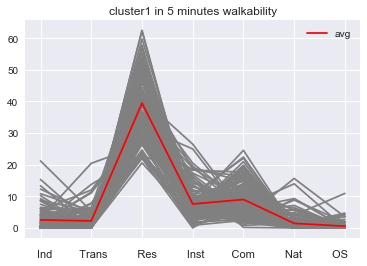

In [145]:
data.plot(color='grey',legend = False)
cal['avg'].plot(x='category',color='red',legend = 'average')
plt.title("cluster1 in 5 minutes walkability")
plt.xlabel("Ind         Trans          Res          Inst         Com          Nat          OS")

In [105]:
labels=np.array(['Industrial', 'Transportation','Residential', 'Institutional', 'Commercial ', 'Natural','Open Space'])
stats=cal['avg'].values

In [106]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle
# close the plot
stats=np.concatenate((stats,[stats[0]]))  # Closed
angles=np.concatenate((angles,[angles[0]]))  # Closed

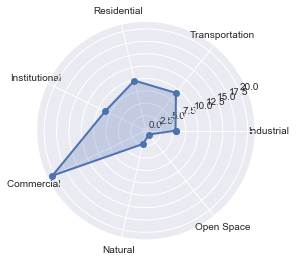

In [107]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
#ax.set_title([df.loc[386,"Name"]])  # Set the pokemon's name as the title
#ax.set_rlim(0,250)
ax.grid(True)